## Churn Modelling Problem Statement
This a type of classification problem where we have the dataset of a bank cutomers with their detail.Now,We have to predict that whether the particular customer will leave the bank with in 6 months.

## Classification Model Template
### Step1:- Importing the Libraries
### Step2:- Importing the Dataset
### Step3:- Splitting the dataset into Train set and Test set
### Step4:- Feature Scaling
### Step5:- Fitting classifier to the Training Set
### Step6:- Predicting the Test set results
### Step7:- Making the Confusion Matrix
### Step8:- Visualising the Training Set results
### Step9:- Visualising the Test Set results
### Step10:- Verifying the classification report

In [16]:
#Importing the Libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder


In [17]:
#Importing the Dataset
df=pd.read_csv("Churn_Modelling.csv")
dff=pd.DataFrame(df)
X=df.iloc[:,3:13].values
y=df.iloc[:,13].values

In [18]:
del dff['Surname']

In [19]:
del dff['CustomerId']

In [20]:
dff.isnull()

,RowNumber,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False


In [21]:
dff.head()

,RowNumber,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [22]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
RowNumber          10000 non-null int64
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [23]:
dff.describe()

,RowNumber,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [24]:
dff.dtypes

RowNumber            int64
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

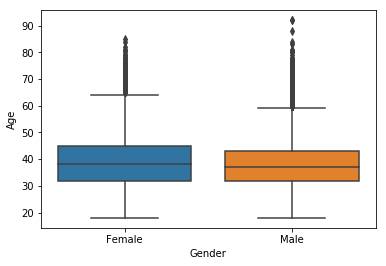

In [25]:

sns.boxplot(x="Gender",y="Age",data=dff)

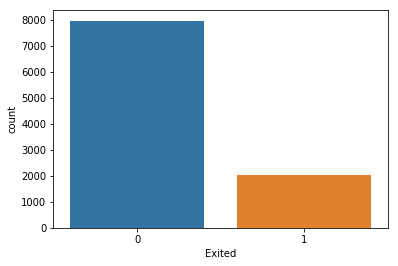

In [26]:
sns.countplot(dff['Exited'])

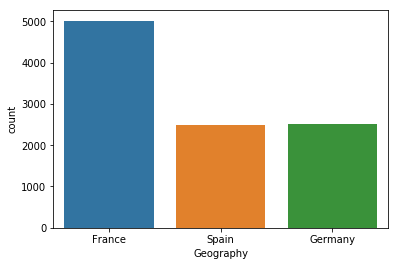

In [27]:
sns.countplot(dff['Geography'])

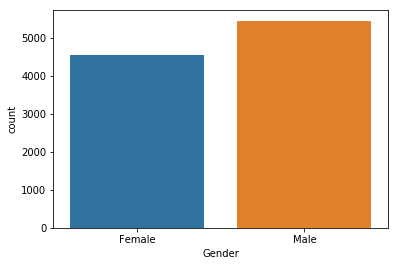

In [28]:
sns.countplot(dff['Gender'])

In [29]:
pd.crosstab(dff['Exited'],dff['Gender'])

Gender,Female,Male
Exited,,
0,3404,4559
1,1139,898


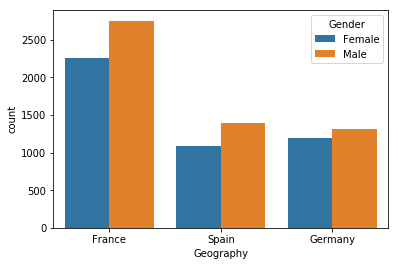

In [30]:
sns.countplot(x="Geography",hue="Gender",data=dff)

In [31]:
dff.describe(include="all")

,RowNumber,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


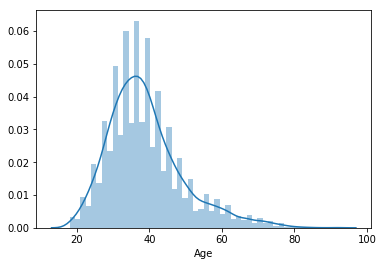

In [32]:
sns.distplot(dff['Age'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb283f94e90>,
      dtype=object)

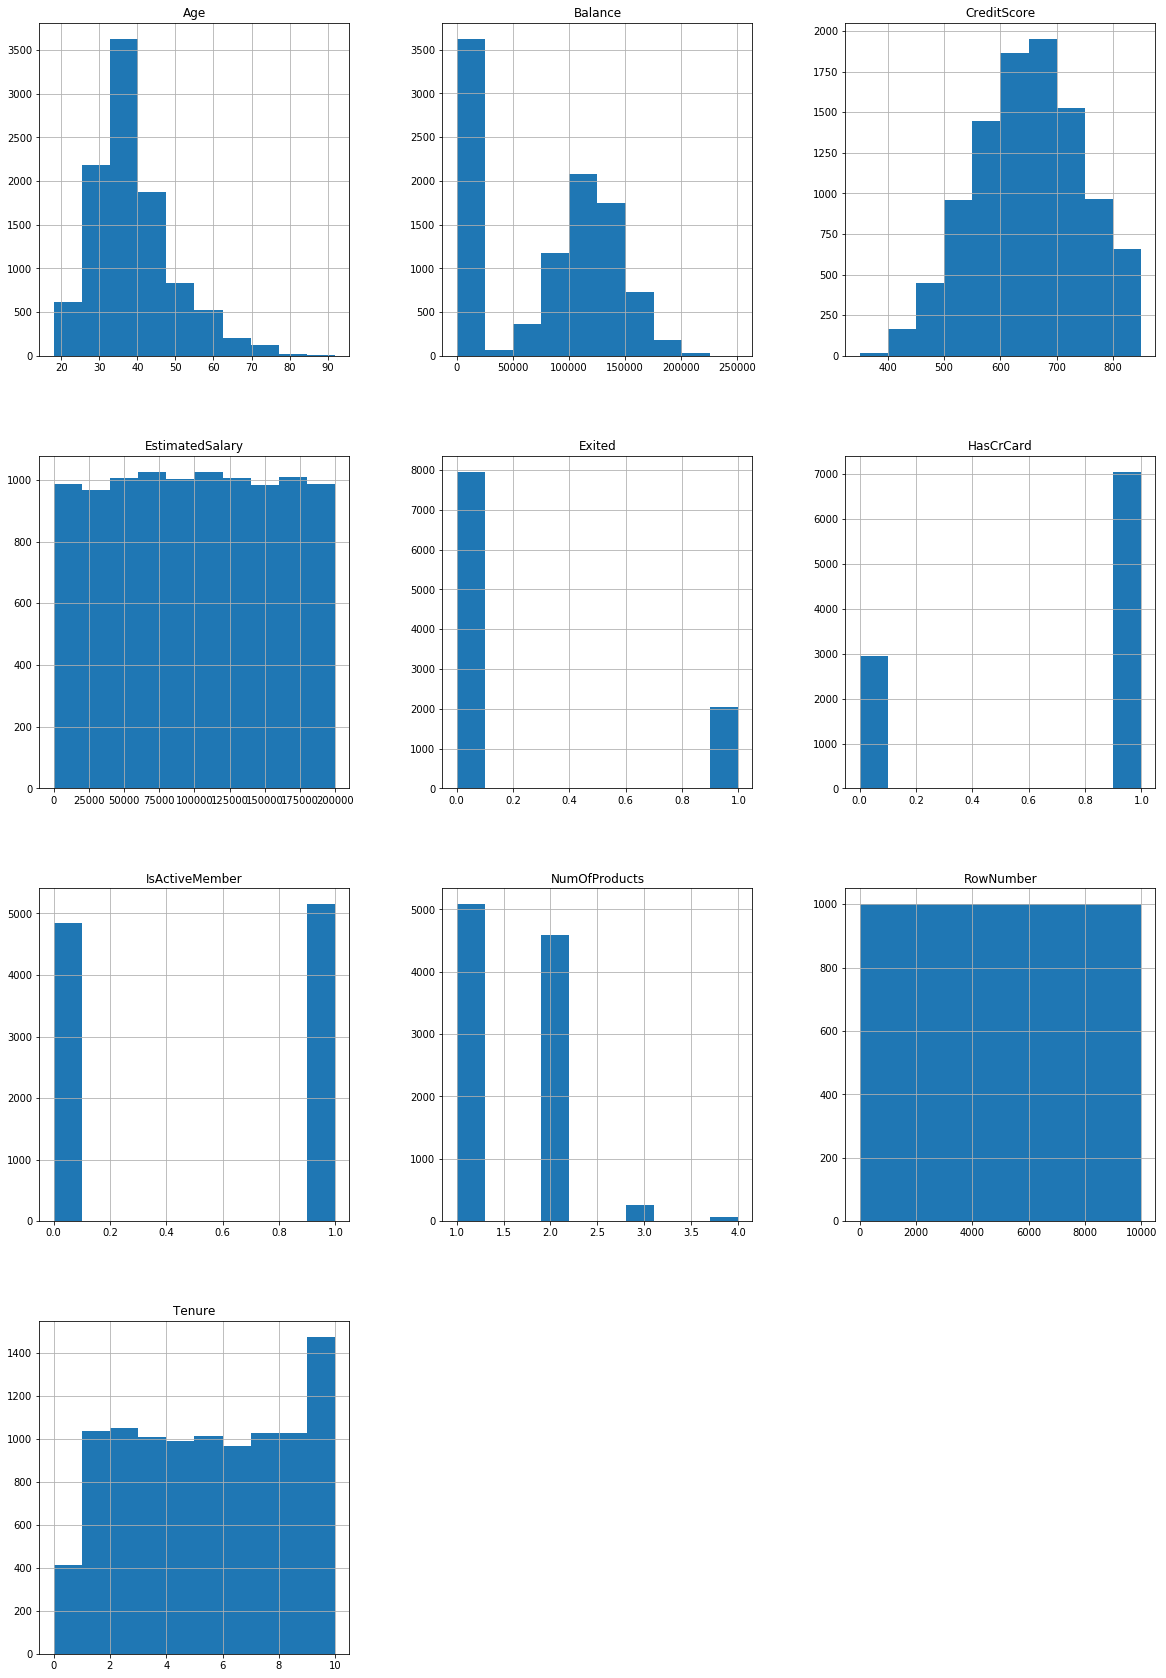

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline


dff.hist(figsize=(20,30))

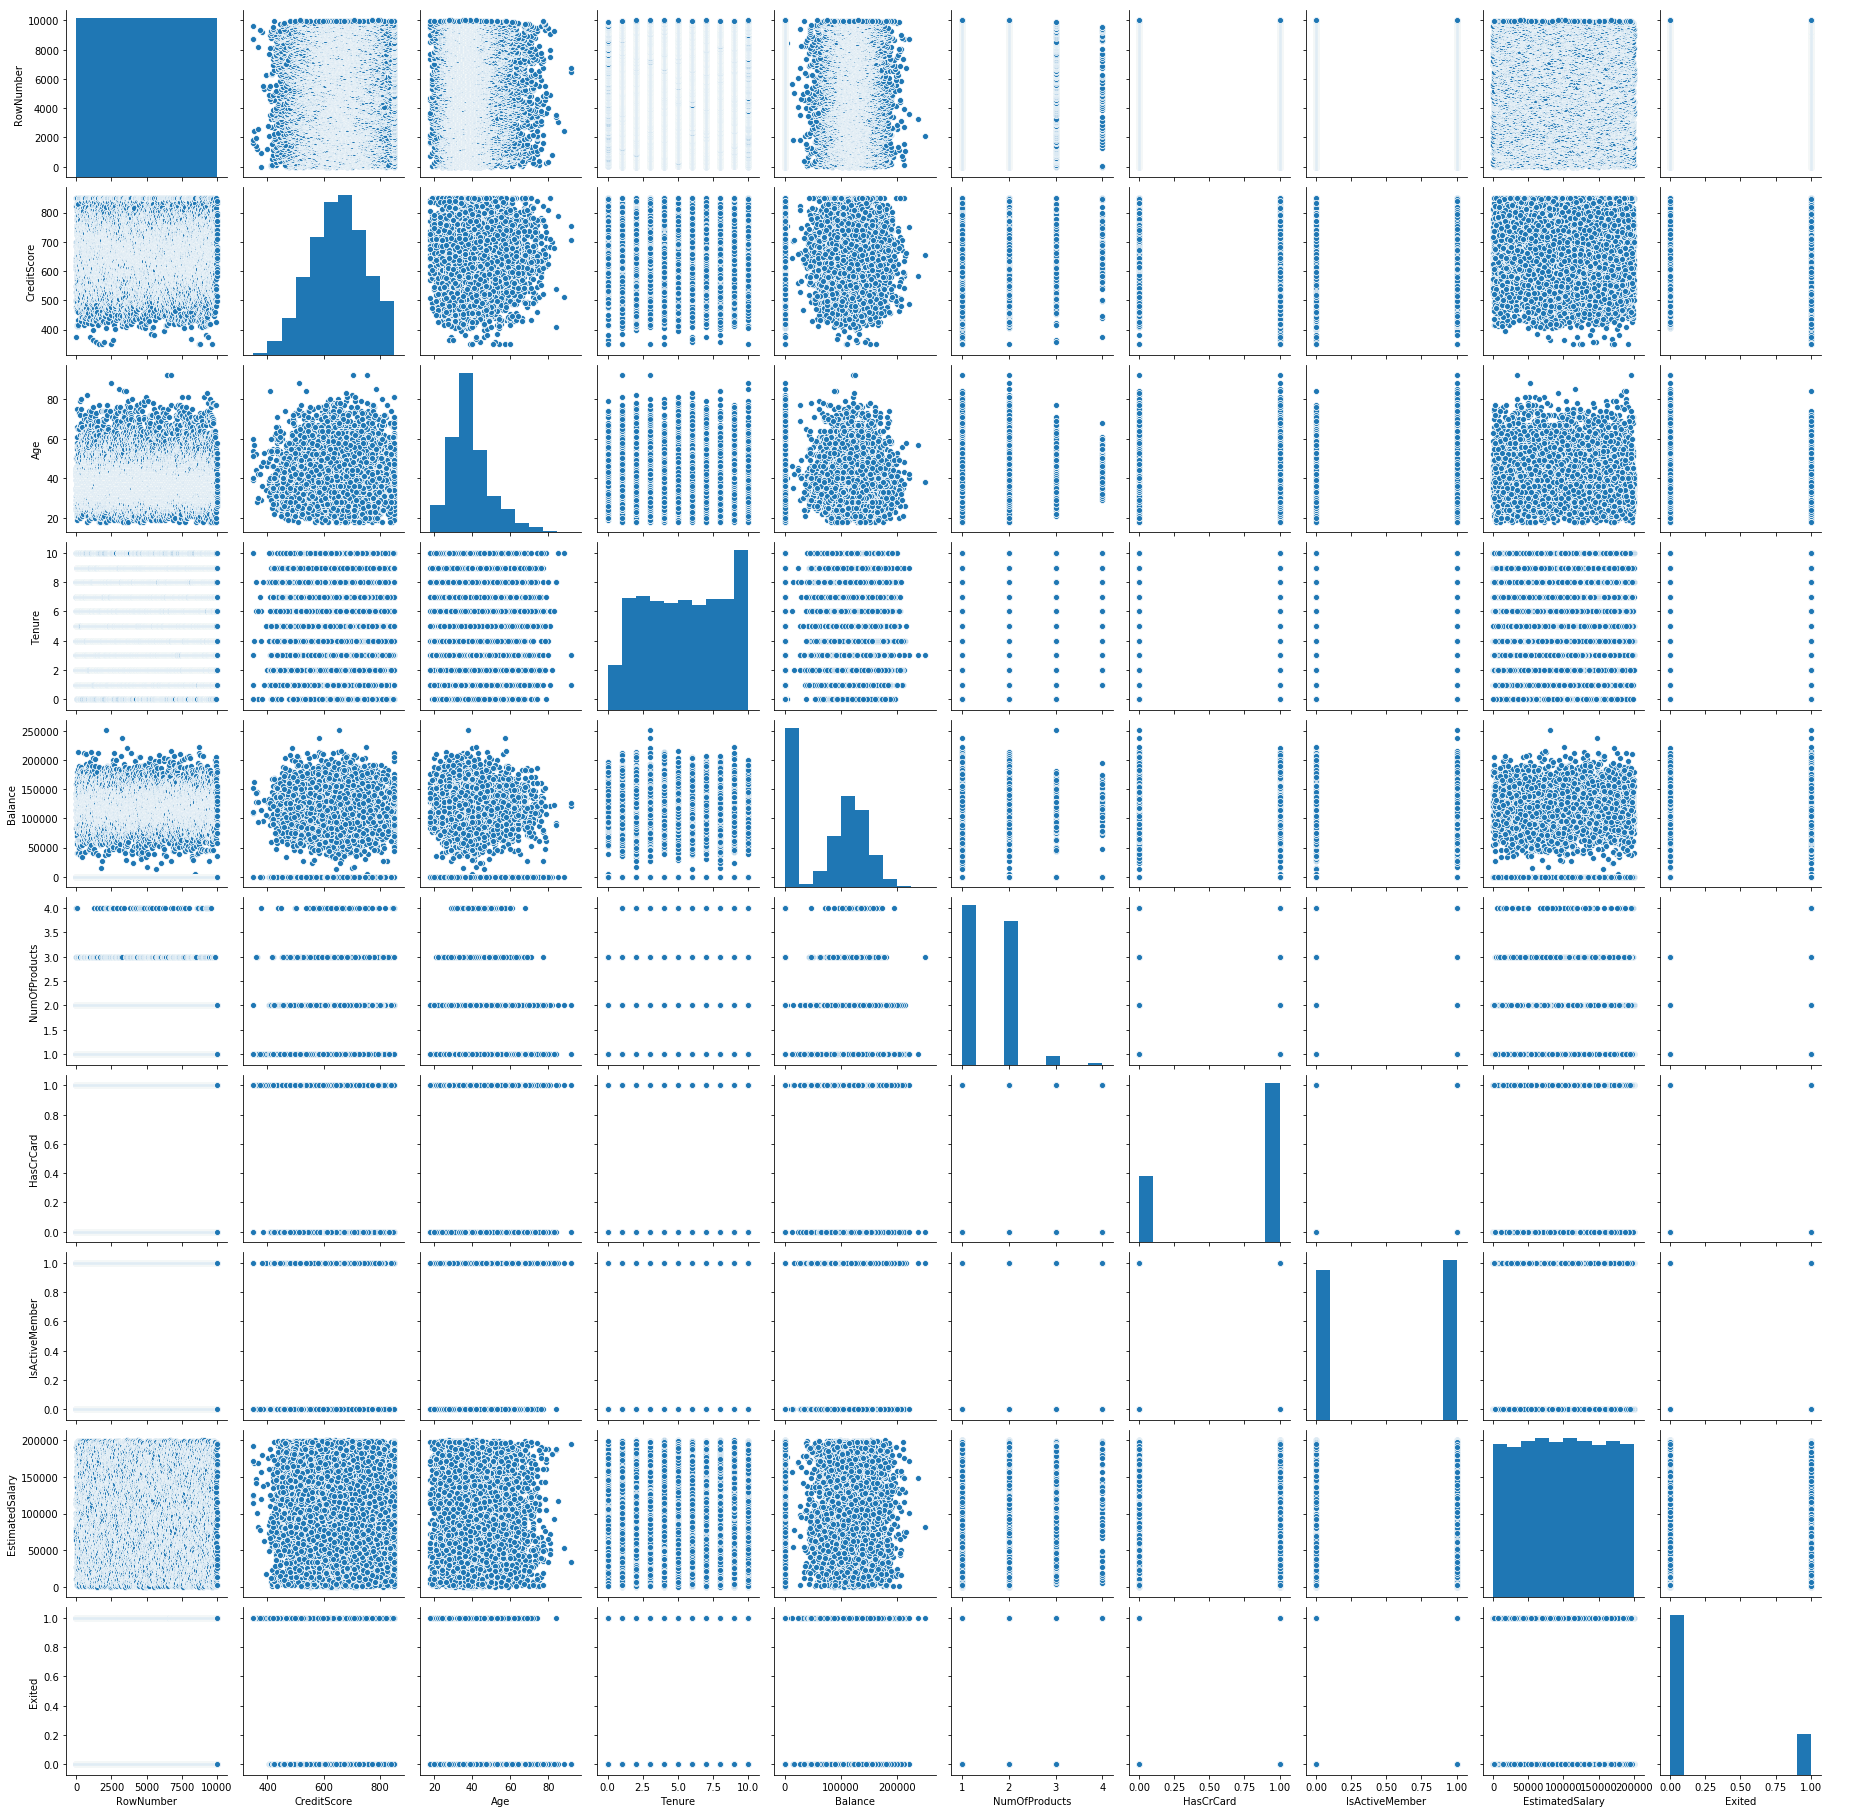

In [34]:
sns.pairplot(dff)

In [39]:
#Encoding string to dummy representation
labelEncoder_x1=LabelEncoder()
X[:,1]=labelEncoder_x1.fit_transform(X[:,1])
labelEncoder_x2=LabelEncoder()
X[:,2]=labelEncoder_x2.fit_transform(X[:,2])
onehotencoder=OneHotEncoder(categorical_features=[1])
X=onehotencoder.fit_transform(X).toarray()
X=X[:,1:]

/home/manendra/.local/lib/python2.7/site-packages/sklearn/preprocessing/_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [40]:
#Splitting the dataset into Train set and Test set
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=10)

In [41]:
#Feature Scaling

sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)


In [42]:
x_train

array([[-0.57160228,  1.73328336, -1.51676158, ...,  0.63848074,
         0.97393946,  0.95740791],
       [-0.57160228, -0.57693971, -1.07024598, ..., -1.56621795,
         0.97393946, -0.77162689],
       [-0.57160228, -0.57693971, -0.43681687, ..., -1.56621795,
         0.97393946,  1.31581522],
       ...,
       [-0.57160228,  1.73328336, -1.98404535, ...,  0.63848074,
        -1.02675787, -0.14729236],
       [-0.57160228, -0.57693971,  0.60159151, ...,  0.63848074,
        -1.02675787, -0.74800994],
       [-0.57160228,  1.73328336,  0.21738041, ...,  0.63848074,
        -1.02675787, -1.71775713]])

In [43]:
#Now Lets Make the ANN!!
# Importing the keras libraries and packages

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [44]:
#initialization the ANN
classifier = Sequential()

## Training the _ANN_ with Stochastic Gradient Descent
The steps are given below:
### Step 1: Randomly initilise the weight to small numbers close to 0(but not 0).
### Step 2: Input the first observation of your dataset in the input layer each feature in one input node.
### Step 3:Forward-Propagation:from left to right, the neurons are activated in a way that the impact of each neurons activation is limited by the weights. Propagate the activations until getting the preedicted result y.
### Step 4:Compare the predicted result to the actual result. Measure the generated error.
### Step 5:Back-Propagation: from right to left, the error is back-propagated. Update the weights according to how much they are responsible for the error. The learning rate decides by how much we update the weights.
### Step 6:Repeat steps 1 to 5 and update the weights after each observation(Reinforcement Learning) or Repeat steps 1 to 5 but update the weights only after a batch of observations(Batch Learning).
### Step 7: When the whole training set passed through the ANN, that makes an epoch. Redo mode epochs. 

In [45]:
#Adding the input layer and first hidden layer

classifier.add(Dense(6,kernel_initializer='uniform',activation='relu',input_dim=11))

In [46]:
#adding the second hidden layer
classifier.add(Dense(6,kernel_initializer='uniform',activation='relu'))


In [47]:
#adding output layer 
classifier.add(Dense(1,kernel_initializer='uniform',activation='sigmoid'))

In [48]:
#Compiling the ANN
classifier.compile(optimizer='adam',loss="binary_crossentropy",metrics=['accuracy'])

In [49]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 72        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


Train on 7500 samples, validate on 2500 samples
Epoch 1/100
7500/7500 [==============================] - 2s 216us/sample - loss: 0.4827 - accuracy: 0.7959 - val_loss: 0.4389 - val_accuracy: 0.7944
Epoch 2/100
7500/7500 [==============================] - 1s 194us/sample - loss: 0.4260 - accuracy: 0.7969 - val_loss: 0.4319 - val_accuracy: 0.7944
Epoch 3/100
7500/7500 [==============================] - 1s 190us/sample - loss: 0.4198 - accuracy: 0.7969 - val_loss: 0.4262 - val_accuracy: 0.7944
Epoch 4/100
7500/7500 [==============================] - 1s 173us/sample - loss: 0.4149 - accuracy: 0.8203 - val_loss: 0.4240 - val_accuracy: 0.8236
Epoch 5/100
7500/7500 [==============================] - 1s 185us/sample - loss: 0.4127 - accuracy: 0.8296 - val_loss: 0.4218 - val_accuracy: 0.8236
Epoch 6/100
7500/7500 [==============================] - 1s 188us/sample - loss: 0.4106 - accuracy: 0.8333 - val_loss: 0.4206 - val_accuracy: 0.8260
Epoch 7/100
7500/7500 [==============================] - 2

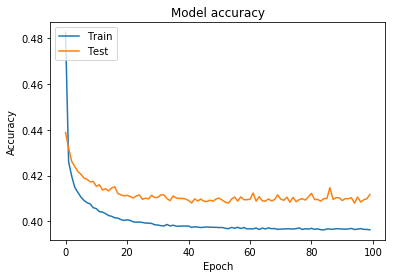

In [32]:
#Fitting the ANN to the training set
history=classifier.fit(x_train,y_train,batch_size=10,epochs=100,validation_data=(x_test, y_test))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [50]:
y_pred=classifier.predict(x_test)

In [51]:
y_pred=(y_pred>0.5)

In [52]:
y_pred

array([[False],
       [ True],
       [ True],
       ...,
       [False],
       [ True],
       [ True]])

In [53]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
report=classification_report(y_test,y_pred)


In [54]:
report

u'              precision    recall  f1-score   support\n\n           0       0.81      0.55      0.66      1986\n           1       0.22      0.49      0.30       514\n\n   micro avg       0.54      0.54      0.54      2500\n   macro avg       0.51      0.52      0.48      2500\nweighted avg       0.69      0.54      0.58      2500\n'

In [55]:
confusion_matrix(y_test,y_pred)

array([[1096,  890],
       [ 264,  250]])

In [56]:
accuracy_score(y_test,y_pred)

0.5384

In [57]:
X=np.array([[1,0],[0,1]])
Y=np.array([[2,1],[1,2]]) 
Z=np.dot(X,Y)
Z

array([[2, 1],
       [1, 2]])

In [58]:
#Part 4 - Evaluating , Improving and Tuning the ANN
#Evaluating the ANN
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(6,kernel_initializer='uniform',activation='relu',input_dim=11))
    classifier.add(Dense(6,kernel_initializer='uniform',activation='relu'))
    classifier.add(Dense(1,kernel_initializer='uniform',activation='sigmoid'))
    classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    return classifier 
classifier = KerasClassifier(build_fn=build_classifier,batch_size=10,epochs=100)
accuracies = cross_val_score(estimator=classifier,X=x_train,y=y_train,cv=10,n_jobs=-1)
mean = accuracies.mean()
variance = accuracies.std()